Missing values per column:
date     0
sales    0
stock    0
price    0
dtype: int64
Number of duplicate rows: 0
                                date       sales        stock       price
count                            937  937.000000   937.000000  937.000000
mean   2015-04-19 12:23:49.242262528   90.533618  1608.258271    1.592572
min              2014-01-01 00:00:00    0.000000     0.000000    0.000000
25%              2014-08-29 00:00:00   33.000000   794.000000    1.290000
50%              2015-04-20 00:00:00   76.000000  1348.000000    1.390000
75%              2015-12-10 00:00:00  127.000000  1964.000000    1.890000
max              2016-07-31 00:00:00  542.000000  7228.000000    2.980000
std                              NaN   80.682089  1356.691877    0.529502
<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 0 to 936
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    927 non-null    dateti

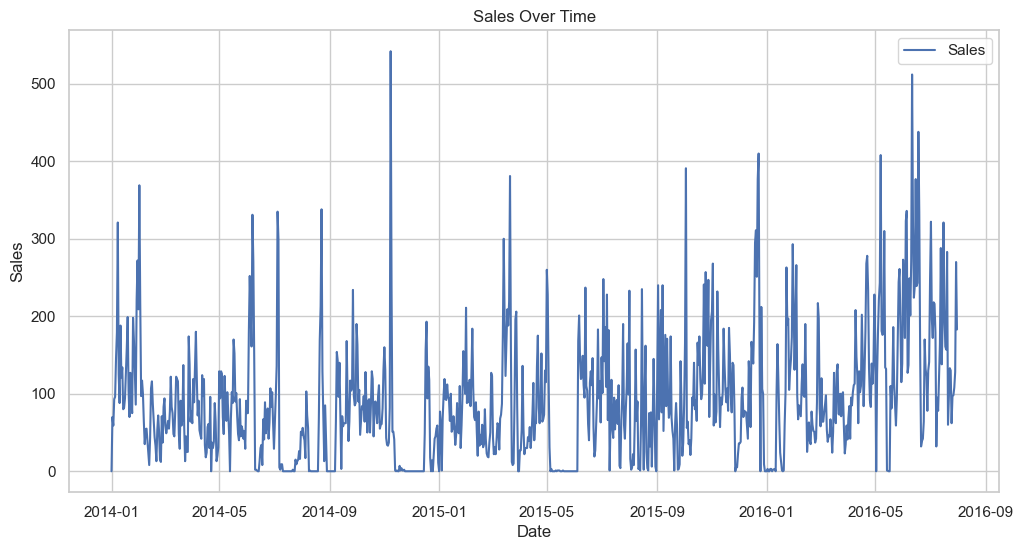

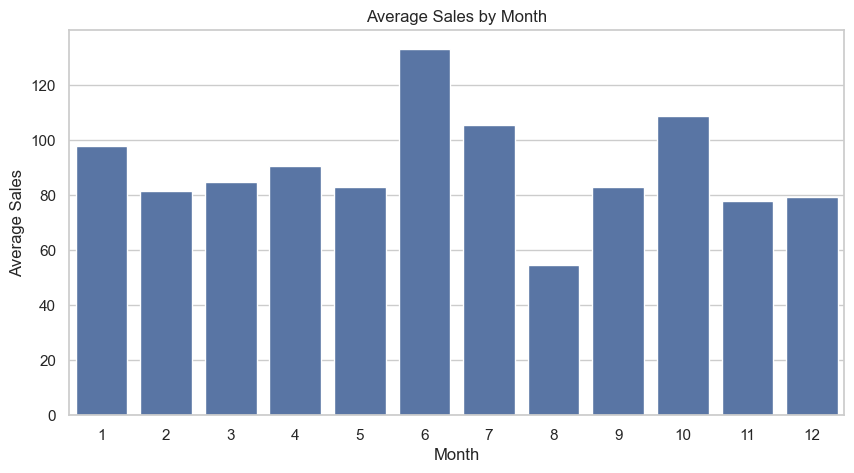

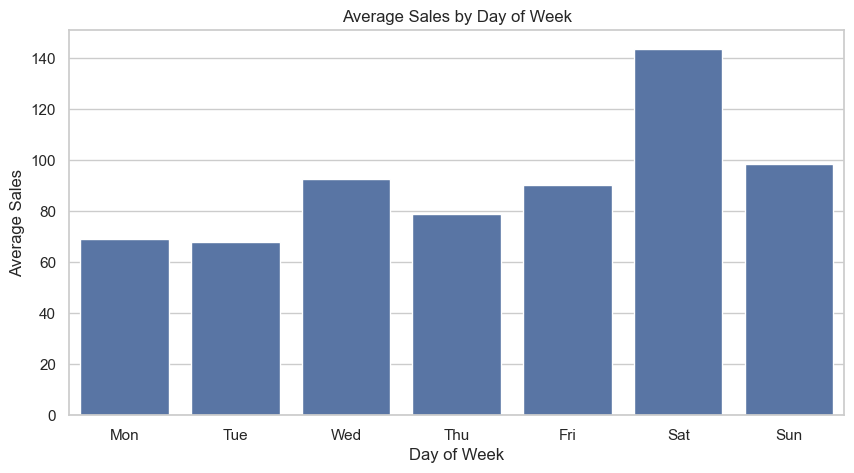

In [2]:
# For inline plots in Jupyter
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('sales-dataset.csv')

# Rename columns to English
df.rename(columns={
    'data': 'date',
    'venda': 'sales',
    'estoque': 'stock',
    'preco': 'price'
}, inplace=True)

# Convert 'date' to datetime type
df['date'] = pd.to_datetime(df['date'])

# Data cleaning
print("Missing values per column:")
print(df.isnull().sum())

print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

print(df.describe())

df = df[(df['sales'] >= 0) & (df['price'] > 0) & (df['stock'] >= 0)]

print(df.info())
print(df.head())

# Data visualization setup
sns.set(style='whitegrid')

# 1. Sales over time
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Add date features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0

# 2. Average sales by month
plt.figure(figsize=(10,5))
monthly_sales = df.groupby('month')['sales'].mean()
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

# 3. Average sales by day of week
plt.figure(figsize=(10,5))
dow_sales = df.groupby('day_of_week')['sales'].mean()
sns.barplot(x=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], y=dow_sales.values)
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.show()


In [3]:
!pip install plotly

In [4]:
# For interactive charts in Jupyter
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv('sales-dataset.csv')

# Rename columns
df.rename(columns={
    'data': 'date',
    'venda': 'sales',
    'estoque': 'stock',
    'preco': 'price'
}, inplace=True)

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Data cleaning
print("Missing values per column:")
print(df.isnull().sum())

print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

df = df[(df['sales'] >= 0) & (df['price'] > 0) & (df['stock'] >= 0)]

print(df.info())
print(df.head())

# Add date features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

# Map for day names
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['day_name'] = df['day_of_week'].apply(lambda x: day_labels[x])

# Interactive Line Chart: Sales over time
fig1 = px.line(df, x='date', y='sales', title='📈 Sales Over Time', markers=True)
fig1.update_traces(line=dict(color='royalblue'))
fig1.show()

# Interactive Bar Chart: Average Sales by Month
monthly_sales = df.groupby('month')['sales'].mean().reset_index()
fig2 = px.bar(monthly_sales, x='month', y='sales',
              title='📊 Average Sales by Month',
              color='sales', color_continuous_scale='Viridis')
fig2.show()

# Interactive Bar Chart: Average Sales by Day of Week
dow_sales = df.groupby('day_name')['sales'].mean().reindex(day_labels).reset_index()
fig3 = px.bar(dow_sales, x='day_name', y='sales',
              title='📅 Average Sales by Day of Week',
              color='sales', color_continuous_scale='Magma')
fig3.show()


Missing values per column:
date     0
sales    0
stock    0
price    0
dtype: int64
Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 0 to 936
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    927 non-null    datetime64[ns]
 1   sales   927 non-null    int64         
 2   stock   927 non-null    int64         
 3   price   927 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 36.2 KB
None
        date  sales  stock  price
0 2014-01-01      0   4972   1.29
1 2014-01-02     70   4902   1.29
2 2014-01-03     59   4843   1.29
3 2014-01-04     93   4750   1.29
4 2014-01-05     96   4654   1.29


In [5]:
# Sales and stock trends over time
fig = px.line(df, x='date', y=['sales', 'stock'], title='📈 Sales vs Stock Over Time')
fig.show()


In [6]:
#Key Performance Indicators - KPIs
# Add revenue column
df['revenue'] = df['sales'] * df['price']

# KPIs
total_sales = df['sales'].sum()
average_daily_sales = df['sales'].mean()
zero_sales_days = (df['sales'] == 0).sum()
total_revenue = df['revenue'].sum()

print(f"Total Sales: {total_sales}")
print(f"Average Daily Sales: {average_daily_sales:.2f}")
print(f"Days with Zero Sales: {zero_sales_days}")
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Sales: 84830
Average Daily Sales: 91.51
Days with Zero Sales: 102
Total Revenue: $138,887.84


In [8]:
#Detect Outliers or Anomalies
# Box plot for sales
fig = px.box(df, y='sales', title='📦 Sales Distribution - Outlier Detection',
             points="all",  # show all data points including outliers
             color_discrete_sequence=['#636EFA'])  # optional: color styling
fig.update_traces(jitter=0.3)  # spread out points for better view
fig.show()

# Box plot for price (to check pricing outliers)
fig2 = px.box(df, y='price', title='💲 Price Distribution - Outlier Detection',
              points="all", color_discrete_sequence=['#EF553B'])
fig2.update_traces(jitter=0.3)
fig2.show()


In [9]:
df.to_csv('cleaned_sales_data.csv', index=False)

In [10]:
pip install streamlit plotly pandas



   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.9 MB 1.5 MB/s eta 0:00:07
   ---- ----------------------------------- 1.0/9.9 MB 1.7 MB/s eta 0:00:06
   ------ --------------------------------- 1.6/9.9 MB 1.6 MB/s eta 0:00:06
   -------- ------------------------------- 2.1/9.9 MB 1.8 MB/s eta 0:00:05
   --------- ------------------------------ 2.4/9.9 MB 1.8 MB/s eta 0:00:05
   ------------ --------------------------- 3.1/9.9 MB 1.9 MB/s eta 0:00:04
   -------------- ------------------------- 3.7/9.9 MB 2.0 MB/s eta 0:00:04
   ----------------- ---------------------- 4.2/9.9 MB 2.1 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.9 MB 2.1 MB/s eta 0:00:03
   ----------------------- ---------------- 5.8/9.9 MB 2.3 MB/s eta 0:00:02
   ------------------------- ---

In [11]:
pip install prophet



   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/13.3 MB 3.0 MB/s eta 0:00:05
   ---- ----------------------------------- 1.6/13.3 MB 3.1 MB/s eta 0:00:04
   ------ --------------------------------- 2.1/13.3 MB 3.4 MB/s eta 0:00:04
   -------- ------------------------------- 2.9/13.3 MB 3.3 MB/s eta 0:00:04
   ----------- ---------------------------- 3.7/13.3 MB 3.2 MB/s eta 0:00:04
   ------------- -------------------------- 4.5/13.3 MB 3.4 MB/s eta 0:00:03
   -------------- ------------------------- 5.0/13.3 MB 3.3 MB/s eta 0:00:03
   ---------------- ----------------------- 5.5/13.3 MB 3.3 MB/s eta 0:00:03
   ------------------ --------------------- 6.3/13.3 MB 3.2 MB/s eta 0:00:03
   -------------------- ------------------- 6.8/13.3 MB 3.2 MB/s eta 0:00:03
   ---------------------- ----------------- 7.3/13.3 MB 3.1 MB/s eta 0:00:02
   ---------